In [1]:
import pandas as pd
df = pd.read_excel('/Users/zhoushimi/Desktop/Data Sets/original datasets/data_11_21.xlsx')

In [2]:
df.head()

,PT,AU,BA,BE,GP,AF,BF,CA,TI,SO,...,PG,WC,SC,GA,UT,PM,OA,HC,HP,DA
0,J,"Johnston, AC; Warkentin, M; Siponen, M",NaN,NaN,NaN,"Johnston, Allen C.; Warkentin, Merrill; Sipone...",NaN,NaN,AN ENHANCED FEAR APPEAL RHETORICAL FRAMEWORK: ...,MIS QUARTERLY,...,22,"Computer Science, Information Systems; Informa...",Computer Science; Information Science & Librar...,CA0IH,WOS:000348600600007,NaN,NaN,Y,N,2021-10-25
1,J,"Joseph, D; Ang, S; Slaughter, SA",NaN,NaN,NaN,"Joseph, Damien; Ang, Soon; Slaughter, Sandra A.",NaN,NaN,Turnover or Turnaway? Competing Risks Analysis...,INFORMATION SYSTEMS RESEARCH,...,20,Information Science & Library Science; Management,Information Science & Library Science; Busines...,CE5HG,WOS:000351861300008,NaN,NaN,NaN,NaN,2021-10-25
2,J,"Kallinikos, J; Constantiou, LD",NaN,NaN,NaN,"Kallinikos, Jannis; Constantiou, Loanna D.",NaN,NaN,Big data revisited: a rejoinder,JOURNAL OF INFORMATION TECHNOLOGY,...,5,"Computer Science, Information Systems; Informa...",Computer Science; Information Science & Librar...,CF8QG,WOS:000352826400009,NaN,Green Published,NaN,NaN,2021-10-25
3,J,"Karoui, M; Dudezert, A; Leidner, DE",NaN,NaN,NaN,"Karoui, Myriam; Dudezert, Aurelie; Leidner, Do...",NaN,NaN,Strategies and symbolism in the adoption of or...,JOURNAL OF STRATEGIC INFORMATION SYSTEMS,...,18,"Computer Science, Information Systems; Informa...",Computer Science; Information Science & Librar...,CG2DF,WOS:000353084400003,NaN,NaN,NaN,NaN,2021-10-25
4,J,"Leong, CML; Pan, SL; Ractham, P; Kaewkitipong, L",NaN,NaN,NaN,"Leong, Carmen Mei Ling; Pan, Shan L.; Ractham,...",NaN,NaN,ICT-Enabled Community Empowerment in Crisis Re...,JOURNAL OF THE ASSOCIATION FOR INFORMATION SYS...,...,39,"Computer Science, Information Systems; Informa...",Computer Science; Information Science & Librar...,CJ1WA,WOS:000355274300002,NaN,NaN,NaN,NaN,2021-10-25


In [3]:
abstracts = df['AB']

# Apply cleaning steps to the 'abstracts'

In [4]:
# import necessary libraries 
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string

# download requrired nltk datasets
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /Users/zhoushimi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zhoushimi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/zhoushimi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
# define cleaning function
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
    
def clean(doc):
    if pd.isnull(doc):
        return ''
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

In [6]:
# apply the cleaning function to the 'abstracts' column: 
df['Clean_Abstracts'] = df['AB'].apply(clean)
print(df['Clean_Abstracts'].head())

0    fear appeal used widely information security c...
1    study draw distributive justice human capital ...
2    elaborate key issue paper new game new rule bi...
3    important role played social network many orga...
4    paper examine emerging use ict social phenomen...
Name: Clean_Abstracts, dtype: object


In [7]:
#Tokenize the cleaned text
df['clean_abstract'] = df['Clean_Abstracts'].apply(nltk.word_tokenize)

# Topic Modeling - the Latent Dirichlet Allocation (LDA) model

In [8]:
import gensim
from gensim import corpora

dictionary = corpora.Dictionary(df['clean_abstract'])
corpus = [dictionary.doc2bow(text) for text in df['clean_abstract']]

In [9]:
# train the Latent Dirichlet Allocation (LDA) model: a generative probabilistic model commonly used for topic modeling in NLP (unsupervised machine learning model)
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, random_state=100, update_every=1, chunksize=100,passes=10, alpha='auto', per_word_topics=True)

In [10]:
print(lda_model.print_topics())

[(0, '0.058*"research" + 0.021*"design" + 0.018*"system" + 0.017*"approach" + 0.017*"theory" + 0.016*"paper" + 0.014*"method" + 0.012*"framework" + 0.011*"researcher" + 0.011*"is"'), (1, '0.046*"product" + 0.036*"consumer" + 0.034*"online" + 0.029*"platform" + 0.027*"effect" + 0.020*"review" + 0.012*"mobile" + 0.011*"find" + 0.009*"purchase" + 0.009*"quality"'), (2, '0.038*"service" + 0.031*"market" + 0.029*"customer" + 0.019*"firm" + 0.018*"price" + 0.018*"provider" + 0.014*"cost" + 0.012*"find" + 0.011*"strategy" + 0.011*"pricing"'), (3, '0.058*"project" + 0.033*"employee" + 0.026*"software" + 0.025*"development" + 0.024*"work" + 0.022*"team" + 0.018*"os" + 0.011*"open" + 0.011*"developer" + 0.010*"organization"'), (4, '0.020*"information" + 0.017*"study" + 0.015*"use" + 0.015*"model" + 0.012*"user" + 0.012*"system" + 0.011*"data" + 0.008*"effect" + 0.008*"result" + 0.008*"using"'), (5, '0.112*"social" + 0.061*"community" + 0.041*"network" + 0.036*"medium" + 0.021*"online" + 0.019*"c

In [11]:
# visualize the top topics
import matplotlib.pyplot as plt

def plot_top_words(lda_model, topic_id, num_words=10):
    
    '''
    plot the top words for a sepcific topic.
    
    Parameters
    
    ---------
    lda_model : gensim.models.LdaModel
        Trained LDA model
    topic_id : int
        The id of the topic
    num_words: int, optional
        The number of words to plot (default is 10)
        
        
    Returns
    
    ------
    
    None
    '''
    
    #get the topic
    topic = lda_model.show_topic(topic_id, num_words)
    
    #split the topic into words and probabilities
    words = [word for word, prob in topic]
    probs = [prob for word, prob in topic]
    
    #create a horizontal bar plot
    plt.figure(figsize=(20,15))
    plt.barh(range(num_words), probs, align='center', color='blue', ecolor='black' )
    plt.yticks(range(num_words), words)
    plt.gca().invert_yaxis()
    plt.xlabel('Probability')
    plt.title(f'Top {num_words} words in topic {topic_id}')
    plt.show()
    

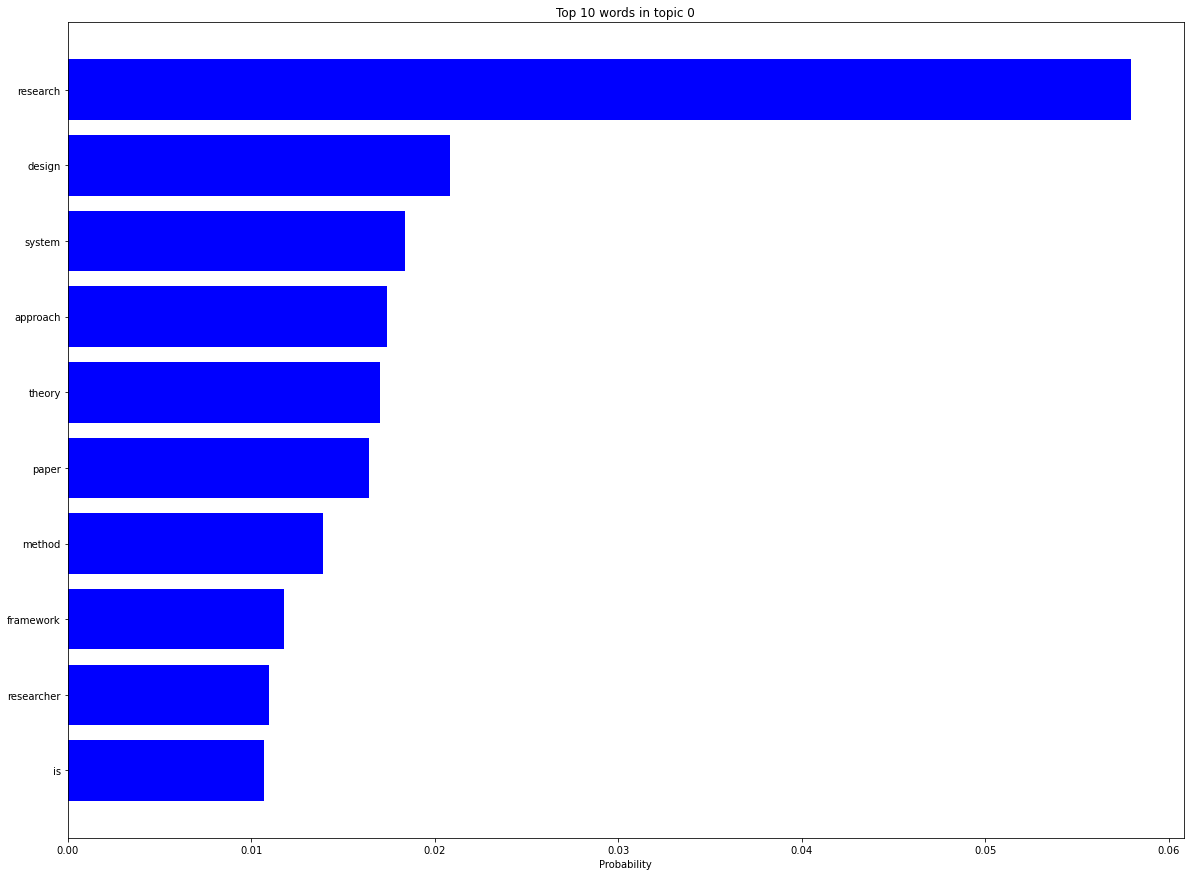

In [14]:
plot_top_words(lda_model, topic_id=0, num_words=10)

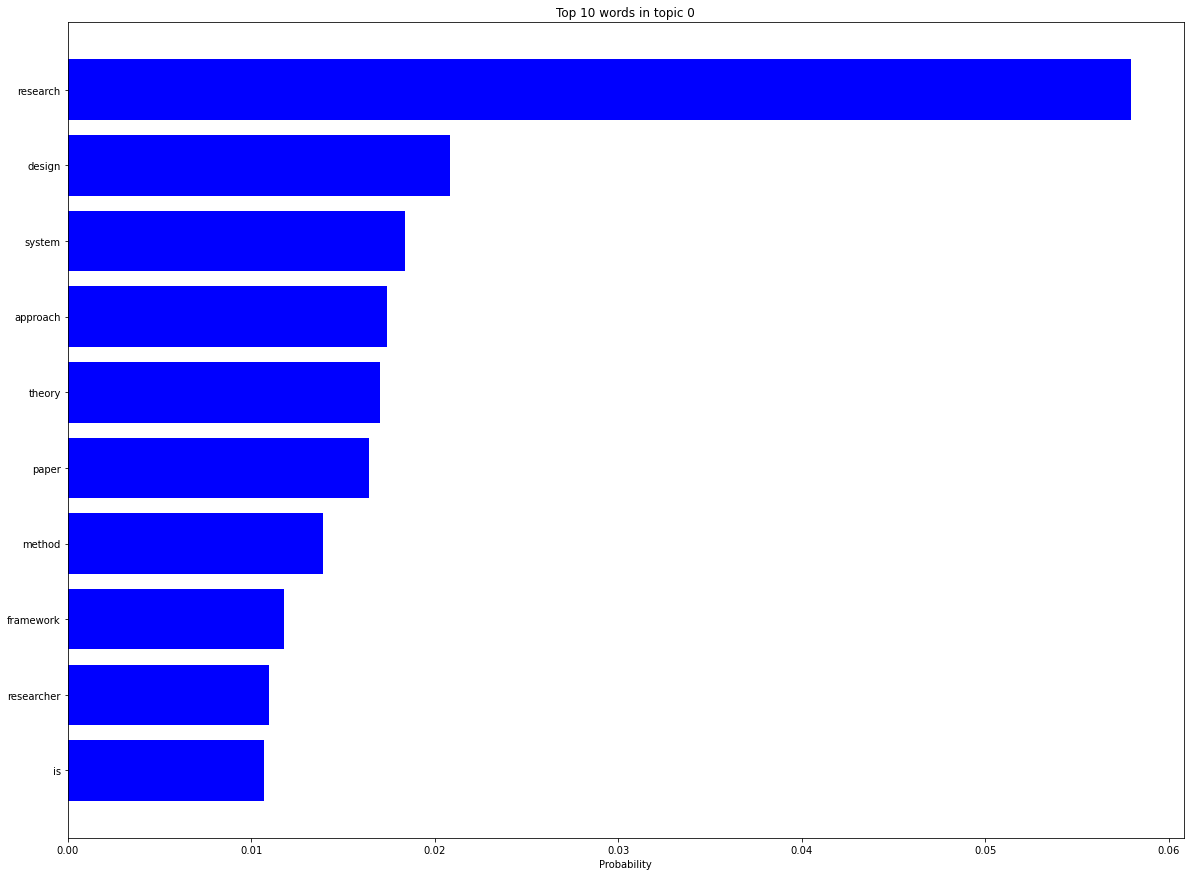

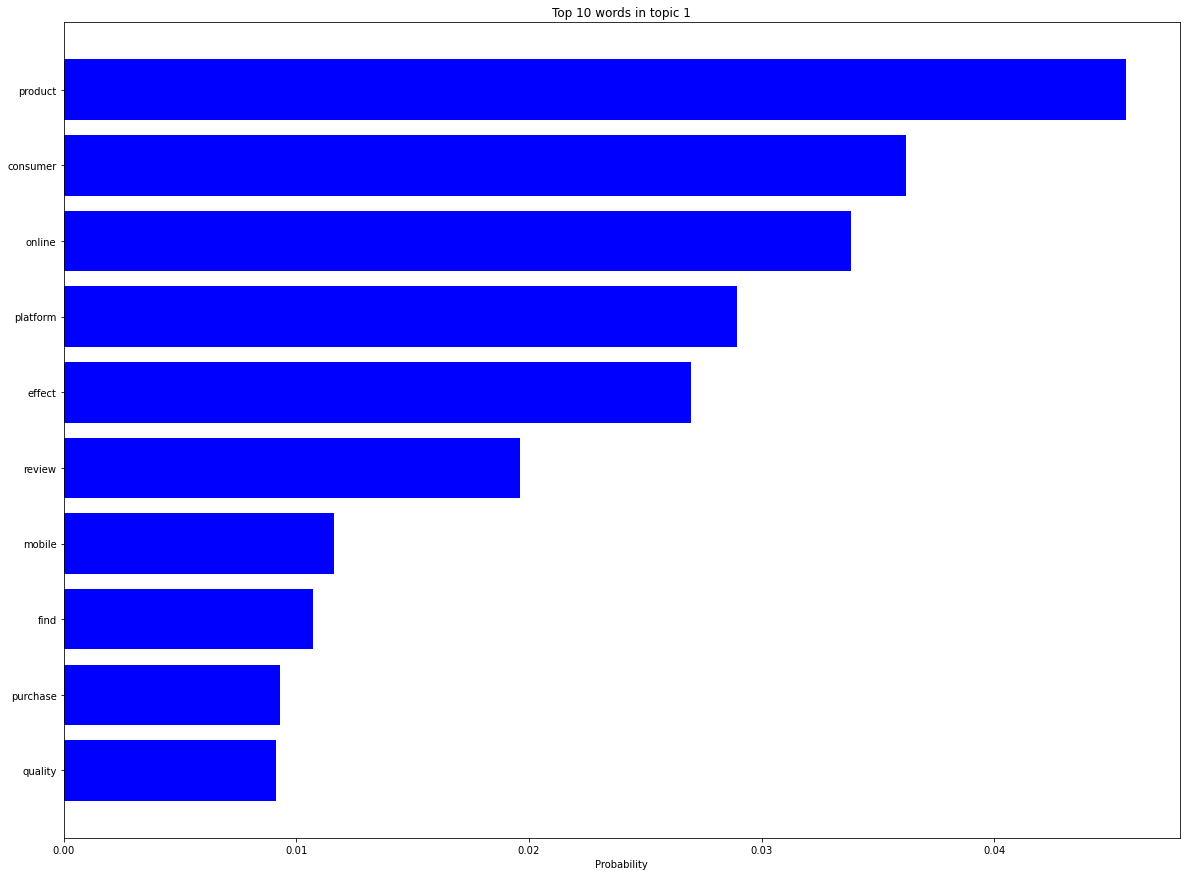

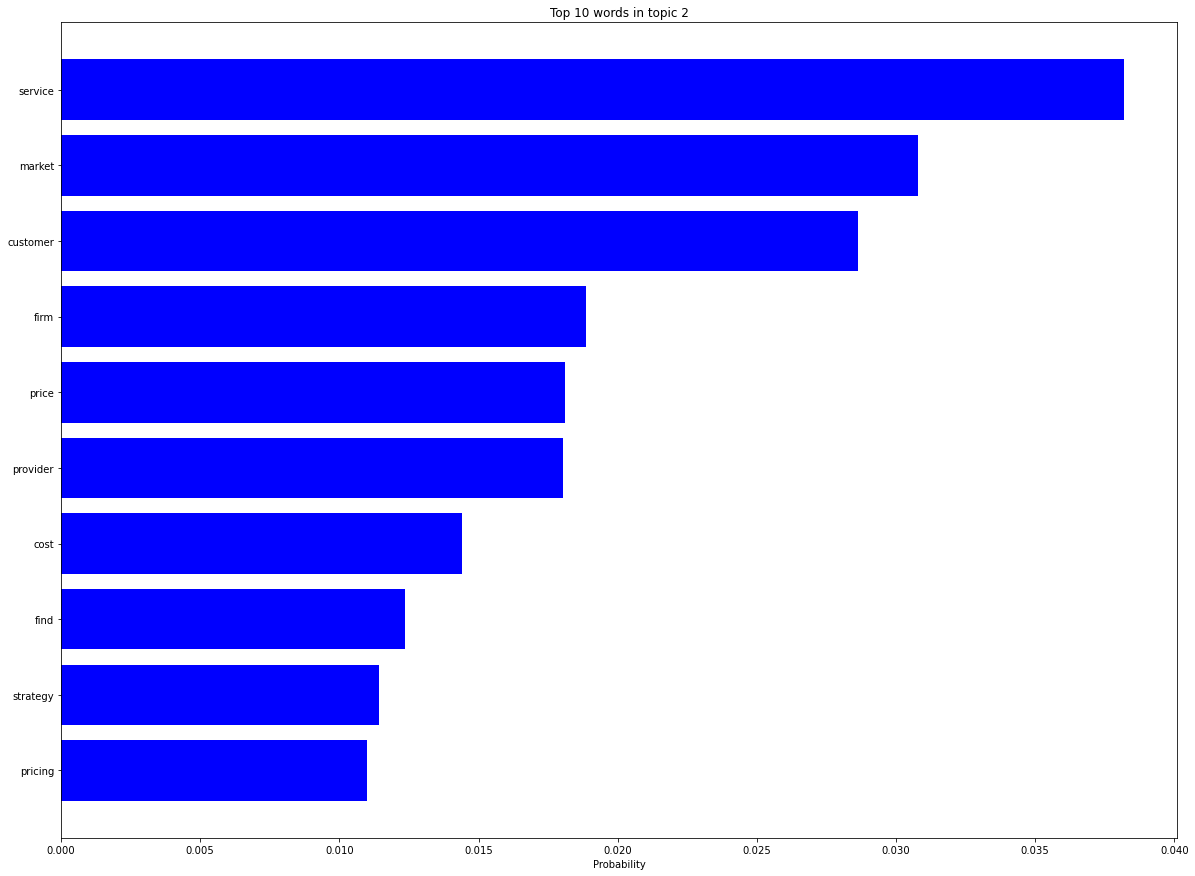

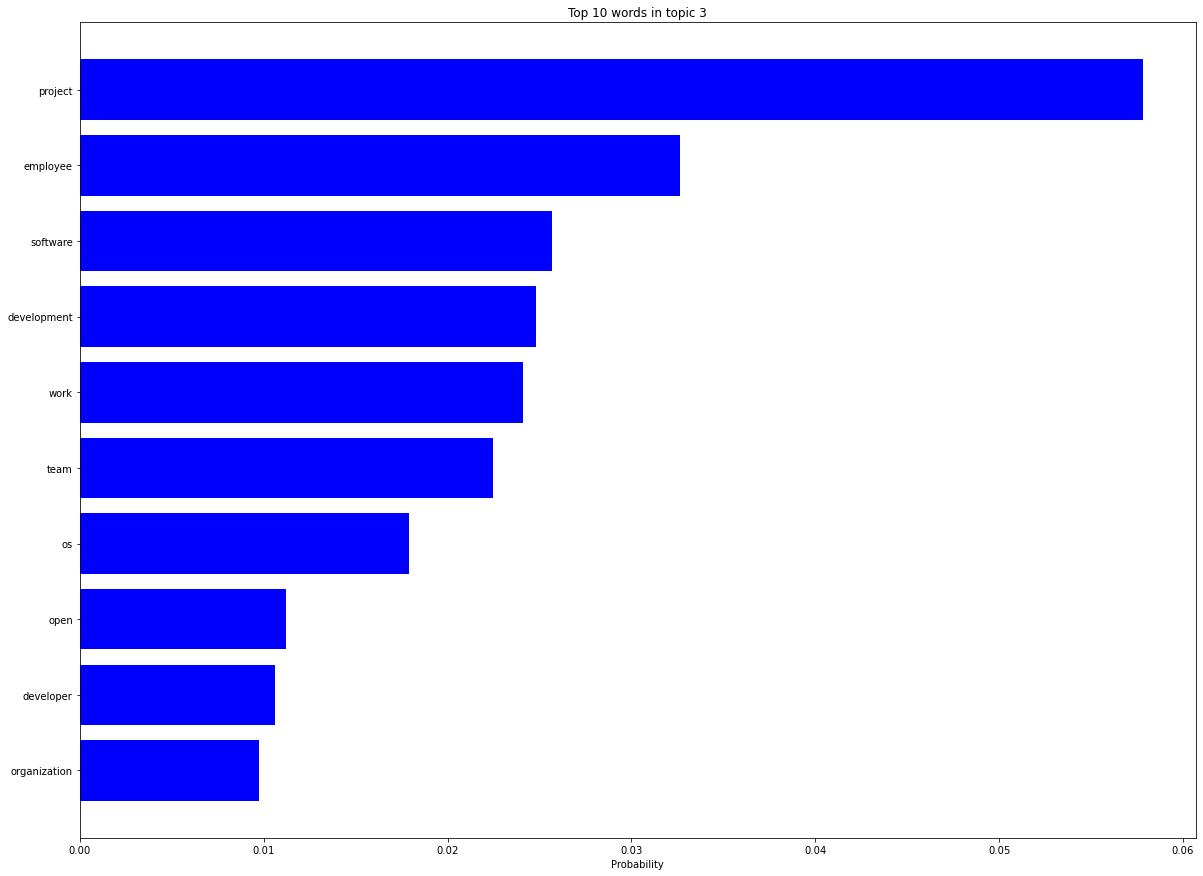

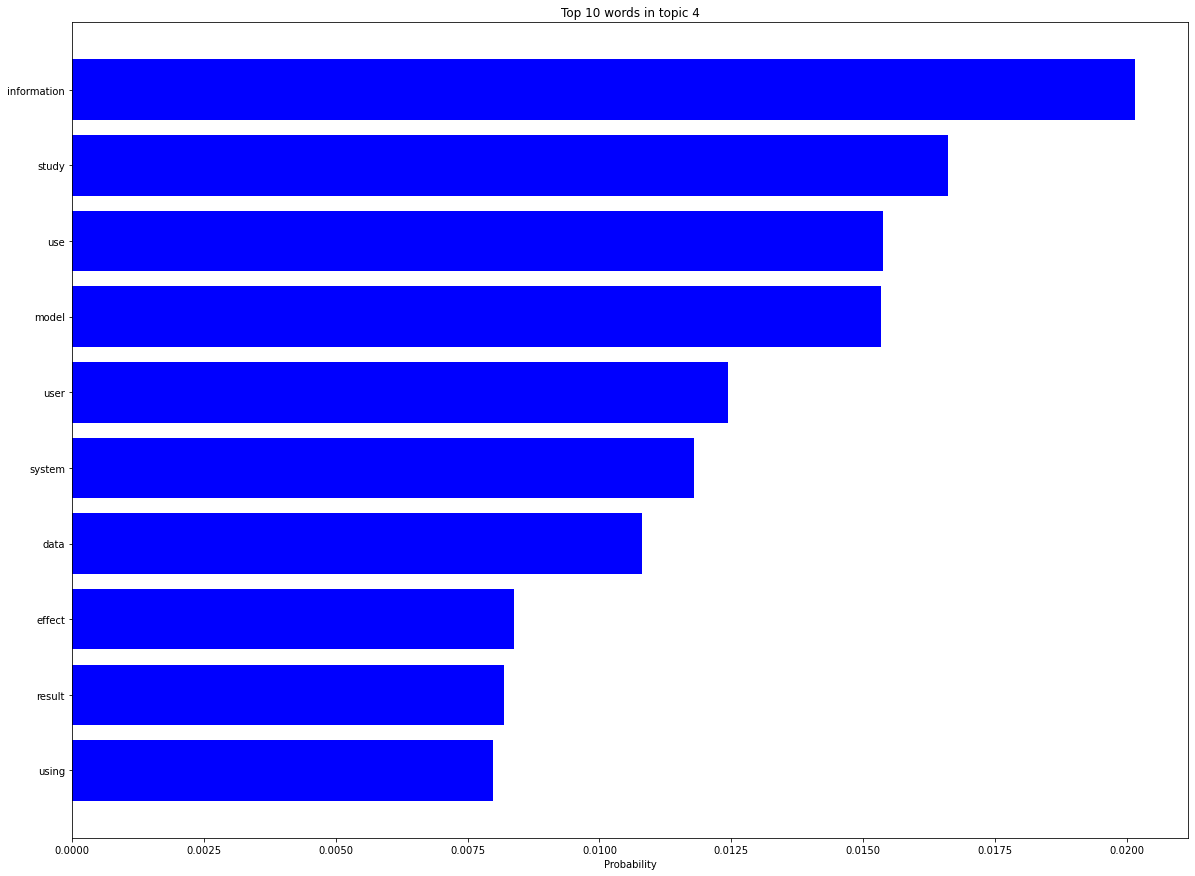

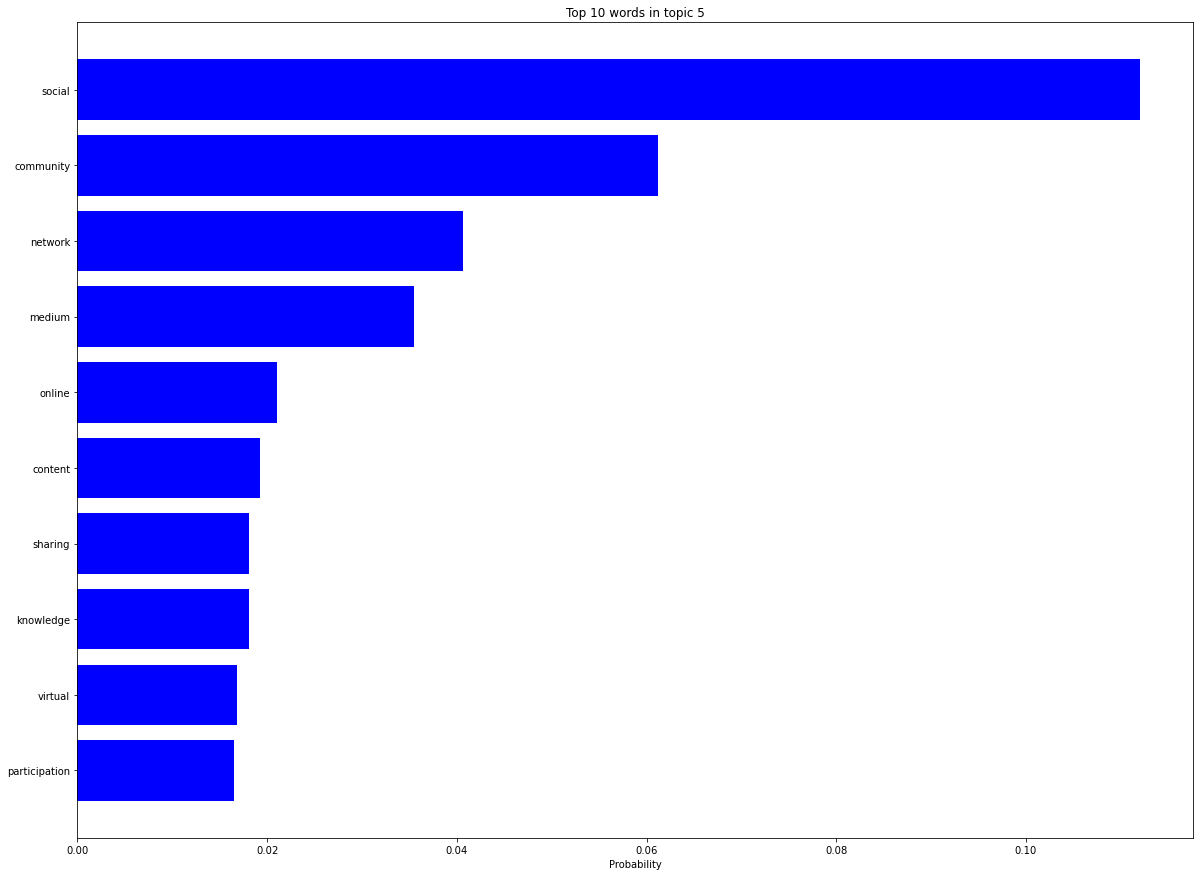

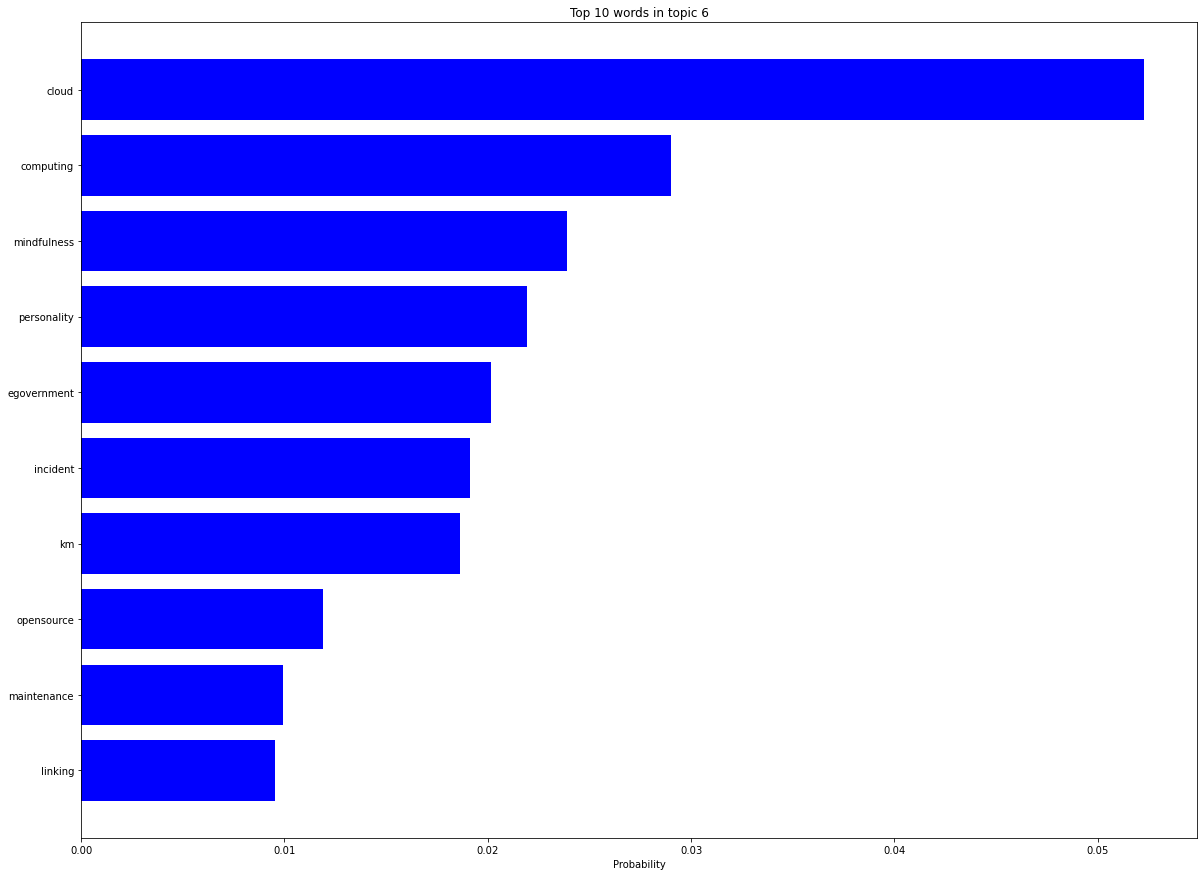

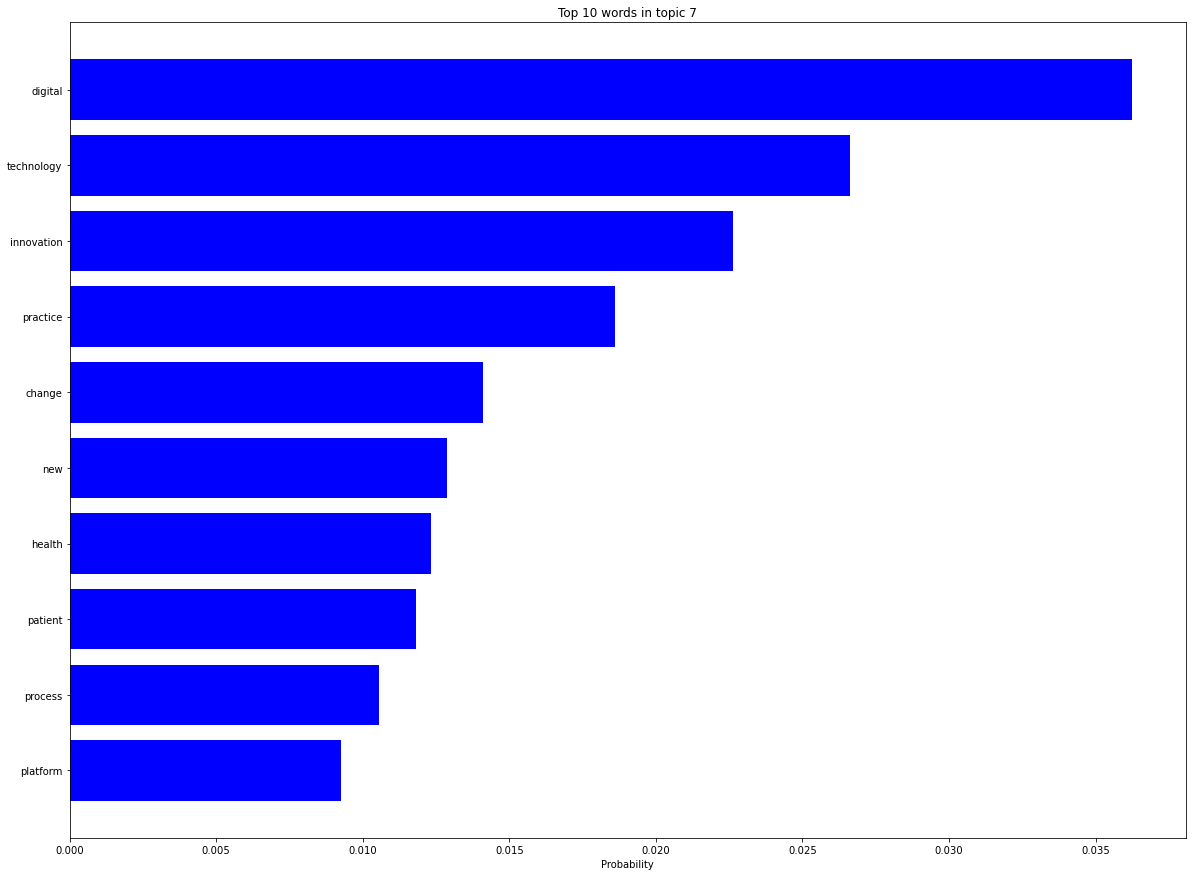

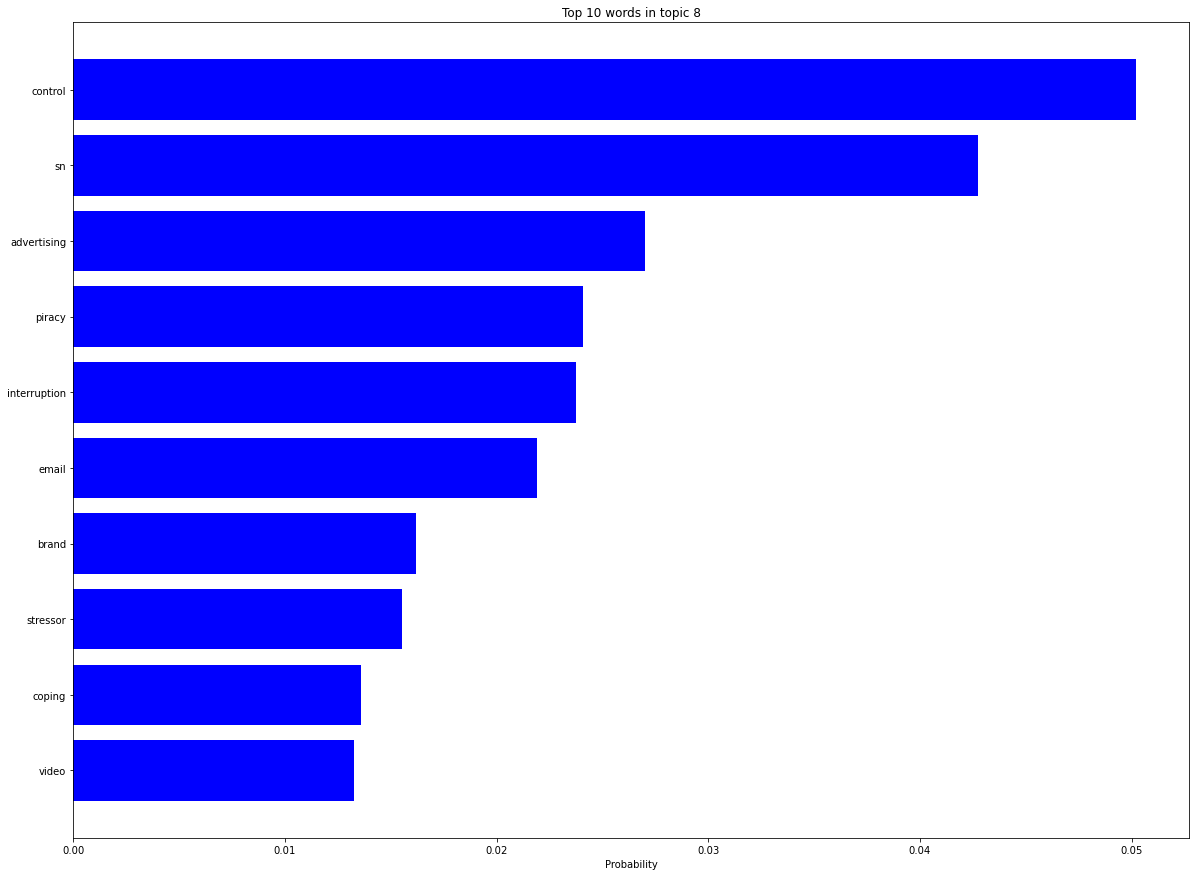

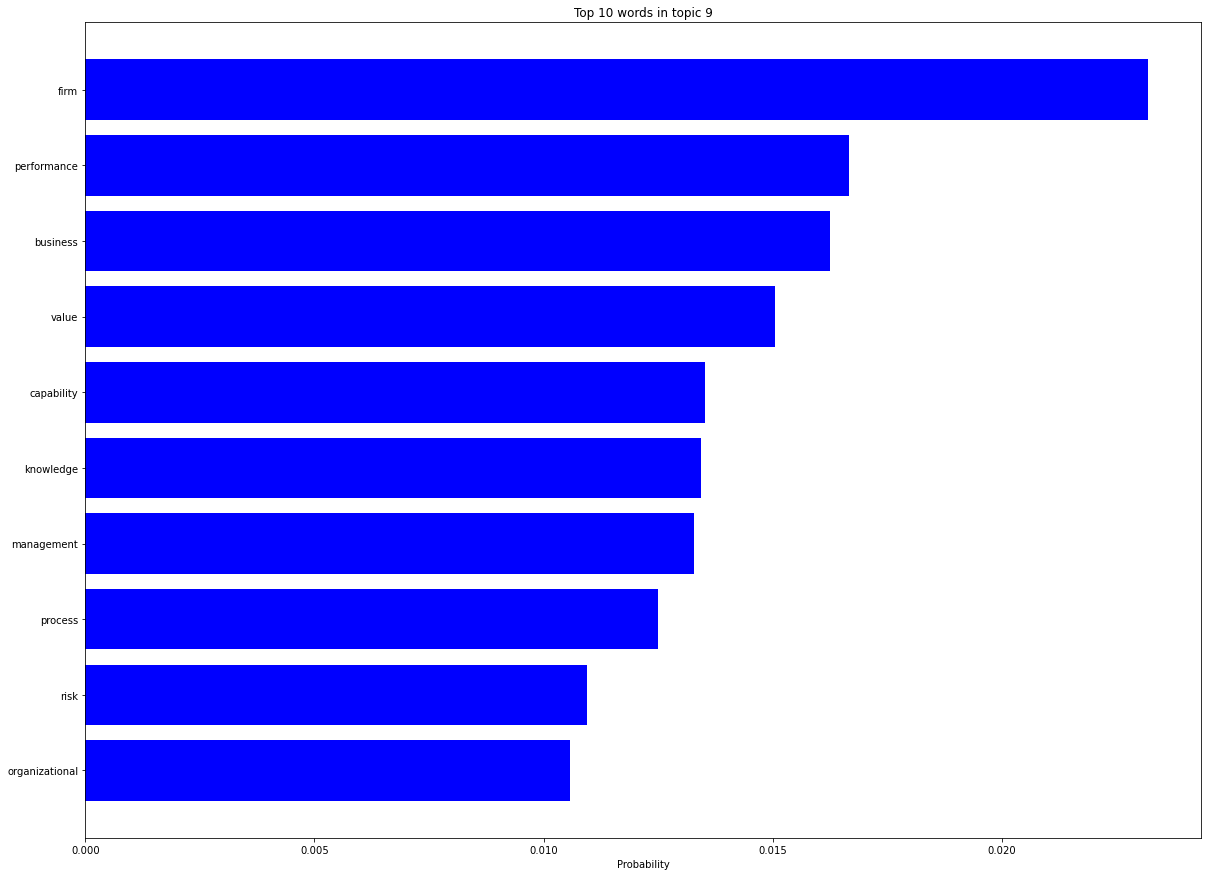

In [15]:
num_topics = lda_model.num_topics

for topic_id in range(num_topics):
    plot_top_words(lda_model, topic_id, num_words=10)